In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Select dataset:
df = pd.read_csv('Routeviews2019.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,17,5554,390,7700,1342,5,28,...,0,0,0,0,0,7093,16,299,310,0
1,1,0,1,0,3762,416,6068,1141,6,28,...,0,0,0,0,0,4382,6,406,304,0
2,2,0,2,0,3106,300,5770,684,6,26,...,0,0,0,0,0,6685,5,296,349,0
3,3,0,3,0,3306,340,7256,1108,6,28,...,0,0,0,0,0,4420,7,279,320,0
4,4,0,4,0,3923,375,6899,920,6,28,...,0,0,0,0,0,5405,7,314,319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,2355,23,55,0,6072,285,29813,530,7,446,...,0,0,0,0,0,6865,15,537,374,0
10076,2356,23,56,0,5885,352,17671,637,6,39,...,0,0,0,0,0,7324,31,433,332,0
10077,2357,23,57,0,5507,336,15280,659,6,71,...,0,0,0,0,0,7140,9,298,323,0
10078,2358,23,58,0,3916,335,8897,606,6,100,...,0,0,0,0,0,5867,4,226,322,0


In [4]:
features = df.loc[:, 4:40]

In [5]:
df.iloc[:, 41].value_counts()

0    6390
1    3690
Name: 41, dtype: int64

In [6]:
X = features
#X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')

In [7]:
def targetify(s):
    if s == 0.0:
        return 0
    else:
        return 1

In [8]:
df['Target']=df.loc[:,41].apply(targetify)

In [9]:
 y = df['Target']

In [10]:
df["Target"].value_counts()

0    6390
1    3690
Name: Target, dtype: int64

In [11]:
X = X.fillna(0)

In [12]:
X = X.apply(pd.to_numeric, errors='coerce')

In [13]:
X = X.fillna(0)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(6048, 37) (6048,)
(4032, 37) (4032,)


In [15]:
y_train.value_counts()

0    3836
1    2212
Name: Target, dtype: int64

In [16]:
y_test.value_counts()

0    2554
1    1478
Name: Target, dtype: int64

In [17]:
X_train.head()

,4,5,6,7,8,9,10,11,12,13,...,31,32,33,34,35,36,37,38,39,40
3518,5149,318,18051,708,6,28,6,13859,143393,2088,...,0,0,0,0,0,0,6093,11,533,345
1412,3141,332,5487,615,6,26,7,6004,118513,2590,...,0,0,0,0,0,0,4023,22,342,321
2570,5110,296,13901,604,6,28,6,7258,126378,2310,...,0,0,0,0,0,0,6087,9,538,314
599,6780,386,15691,1216,6,28,7,22752,320496,4648,...,0,0,0,0,0,0,7705,4,551,324
8148,4521,385,9478,1493,6,28,6,7142,135523,9253,...,0,0,0,0,0,0,5337,9,424,314


In [18]:
forest = ExtraTreesClassifier(n_estimators=100, random_state=2)

In [19]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [20]:
importances = forest.feature_importances_

In [21]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [22]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 33: 37 (0.105452)
2. feature 11: 15 (0.085809)
3. feature 36: 40 (0.079478)
4. feature 0: 4 (0.075095)
5. feature 1: 5 (0.073890)
6. feature 7: 11 (0.071770)
7. feature 2: 6 (0.069780)
8. feature 3: 7 (0.069007)
9. feature 8: 12 (0.066207)
10. feature 35: 39 (0.065264)
11. feature 9: 13 (0.064908)
12. feature 34: 38 (0.062197)
13. feature 5: 9 (0.028234)
14. feature 10: 14 (0.027830)
15. feature 12: 16 (0.020295)
16. feature 6: 10 (0.013313)
17. feature 4: 8 (0.012065)
18. feature 20: 24 (0.002947)
19. feature 22: 26 (0.002737)
20. feature 21: 25 (0.002447)
21. feature 19: 23 (0.000437)
22. feature 32: 36 (0.000303)
23. feature 18: 22 (0.000284)
24. feature 31: 35 (0.000144)
25. feature 17: 21 (0.000105)
26. feature 13: 17 (0.000000)
27. feature 14: 18 (0.000000)
28. feature 15: 19 (0.000000)
29. feature 23: 27 (0.000000)
30. feature 24: 28 (0.000000)
31. feature 25: 29 (0.000000)
32. feature 26: 30 (0.000000)
33. feature 27: 31 (0.000000)
34. feature 28: 32

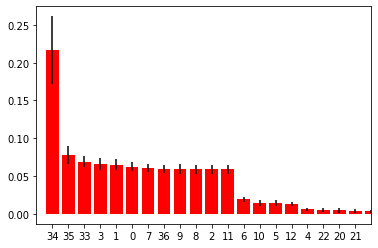

In [23]:
# Plot the top x feature importances of the forest
top_x = 20

plt.figure()
# plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_x), indices)
plt.xlim([-1, top_x])
plt.show()

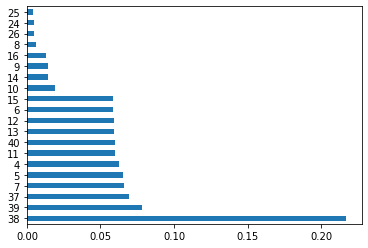

In [24]:
plt = pd.Series(forest.feature_importances_, index=X_train.columns).nlargest(top_x).plot(kind='barh')
fig = plt.get_figure()
fig.savefig('figure.jpg', bbox_inches = "tight")